In [1]:
%cd ..


/Users/kubak/Desktop/mini/sem1/EvolutionaryGradient


In [2]:
from models.neural_network import SimpleNN
from models.de import DifferentialEvolution
from models.es import train_es
from models.adam import train_with_adam
from utils.data_loader import load_mnist
from utils.metrics import evaluate_model


### Load Datasets

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Załaduj dane
train_loader, valid_loader, test_loader, input_size, output_size = load_mnist(batch_size=64, valid_size=0.1)


In [5]:
# Pobierz jedną paczkę danych
images, labels = next(iter(train_loader))

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


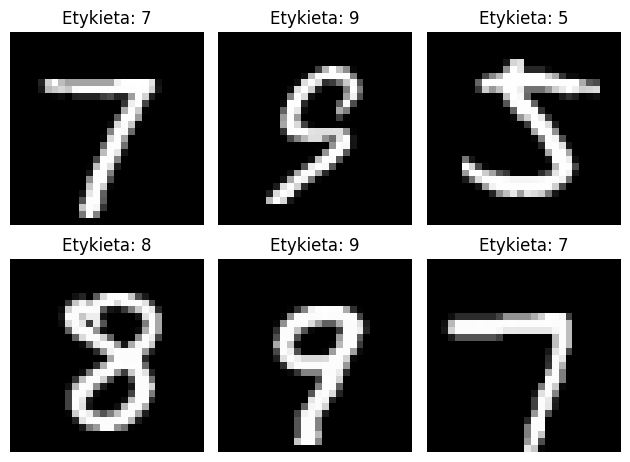

In [6]:
# Wyświetl pierwsze 6 obrazów z etykietami
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    print(images[i].shape)
    plt.title(f'Etykieta: {labels[i].item()}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()


# Create Neural Network

In [7]:
# Zainicjalizuj model
model = SimpleNN(input_size, hidden_size=10, output_size=output_size)


In [8]:

for name, param in model.named_parameters():
    print(f"{name} dtype: {param.dtype}")


model.1.weight dtype: torch.float64
model.1.bias dtype: torch.float64
model.3.weight dtype: torch.float64
model.3.bias dtype: torch.float64


# Train

In [9]:
epochs = 20 
learning_rate = 0.001

In [10]:
train_es(
    model, train_loader, valid_loader=valid_loader,
    mu=10, rho=2, lamb=10, sigma=0.5,
    use_cauchy_variant=True,
    fitness_budget=15000, device='cpu'
)

Gen 1: fitness=-2.3633, calls=60, val_acc=0.0936
Gen 2: fitness=-2.3633, calls=120, val_acc=0.0936
Gen 3: fitness=-2.3633, calls=180, val_acc=0.0936


KeyboardInterrupt: 

In [ ]:
# Wybierz i uruchom metodę treningu
train_with_adam(model, train_loader, valid_loader, epochs, learning_rate, device='cpu')


Epoch 1/20:   0%|          | 0/844 [00:00<?, ?batch/s]

Epoch 1/20: 100%|██████████| 844/844 [00:02<00:00, 359.11batch/s, Loss=0.4970, Accuracy=85.51%]


Epoch 1 completed. Training Loss: 0.4970, Training Accuracy: 85.51%
Validation Loss: 0.3193, Validation Accuracy: 90.67%



Epoch 2/20:  86%|████████▌ | 726/844 [00:02<00:00, 329.23batch/s, Loss=0.2939, Accuracy=91.59%]


KeyboardInterrupt: 

# Evaluation

In [ ]:
# Ewaluacja
accuracy = evaluate_model(model, test_loader)
print(f"Dokładność: {accuracy}%")

Dokładność: {'accuracy': 0.937, 'precision': 0.9362024399459272, 'recall': 0.9364693727882496, 'f1_score': 0.9361961026737788}%
